<a href="https://colab.research.google.com/github/Dahamey/Dahamey.github.io/blob/main/Fashion_Items_Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Neural Networks
In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called *keras*.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

###Dataset
For this notebook we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
# Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist

# Splitting into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Let's have a look at this data :

In [3]:
train_images.shape

(60000, 28, 28)

We've got 60,000 images that are made up of 28x28 pixels (784 in total)

In [7]:
# Let's have a look at one pixel (the 23x23rd pixel in the first image)
train_images[0,23,23]

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [8]:
# Let's have a look at the first 10 training labels (outputs)
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [10]:
# classes of the output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

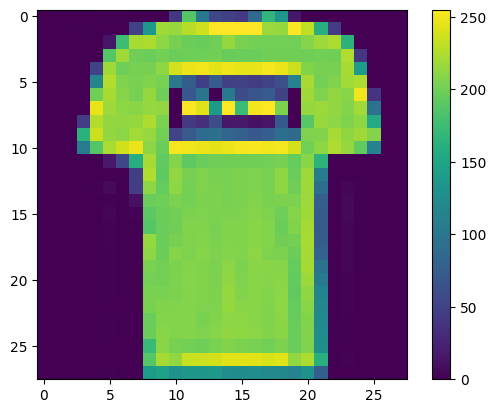

In [15]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This means applying some prior transformations to our data before feeding it the model. In this case we will scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.


In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
test_images.shape

(10000, 28, 28)

In [23]:
trn_images, val_images, trn_labels, val_labels = train_test_split(train_images, train_labels, test_size = .14, stratify = train_labels)

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [38]:
model = keras.Sequential([
    # input layer 1
    keras.layers.Flatten(input_shape = (28,28)),

    # input layer 2
    keras.layers.Dense(128, activation = 'relu'),

    # output layer 3
    keras.layers.Dense(10, activation = "softmax")
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron (in the input).

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [39]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

##Training the Model
Now it's finally time to train our model.

In [40]:
# We pass the data, labels and epochs
model.fit(trn_images, trn_labels, epochs = 10)

Epoch 1/10
1613/1613 [==============================] - 8s 5ms/step - loss: 0.5178 - accuracy: 0.8190
Epoch 2/10
1613/1613 [==============================] - 8s 5ms/step - loss: 0.3889 - accuracy: 0.8595
Epoch 3/10
1613/1613 [==============================] - 6s 4ms/step - loss: 0.3454 - accuracy: 0.8741
Epoch 4/10
1613/1613 [==============================] - 7s 5ms/step - loss: 0.3210 - accuracy: 0.8824
Epoch 5/10
1613/1613 [==============================] - 6s 4ms/step - loss: 0.3041 - accuracy: 0.8884
Epoch 6/10
1613/1613 [==============================] - 7s 5ms/step - loss: 0.2872 - accuracy: 0.8932
Epoch 7/10
1613/1613 [==============================] - 6s 4ms/step - loss: 0.2745 - accuracy: 0.8989
Epoch 8/10
1613/1613 [==============================] - 7s 5ms/step - loss: 0.2610 - accuracy: 0.9031
Epoch 9/10
1613/1613 [==============================] - 7s 4ms/step - loss: 0.2547 - accuracy: 0.9056
Epoch 10/10
1613/1613 [==============================] - 7s 4ms/step - loss: 0.244

Let's evaluate our model on the validation data, The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [41]:
model.evaluate(val_images, val_labels, verbose = 1)

263/263 [==============================] - 1s 5ms/step - loss: 0.3045 - accuracy: 0.8927


[0.30453503131866455, 0.8927381038665771]

##Evaluating the Model
Now it's time to test/evaluate the model.

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print("Test accuracy : ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8803
Test accuracy :  0.880299985408783


Notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [44]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for the first image.

In [45]:
predictions[0]

array([7.5457130e-08, 2.7787861e-10, 1.0903122e-09, 1.3869451e-11,
       6.9742561e-07, 4.2386958e-04, 1.0143002e-08, 5.4522000e-02,
       2.0786539e-08, 9.4505334e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array.

In [46]:
np.argmax(predictions[0])

9

9 means the output predicted is the index number 9 in our class_names array, which is a 'Ankle boot'. We can check if this is correct by looking at the value of the cooresponding test label.

In [47]:
test_labels[0]

9

##Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

In [58]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

Pick a number: 45
1/1 [==============================] - 0s 27ms/step


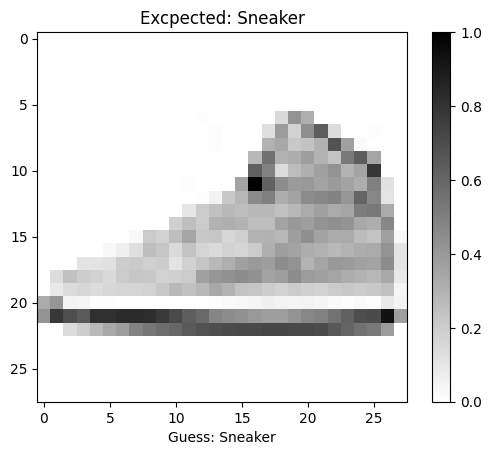

In [59]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

##Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.